In [0]:
import os
import codecs
import zipfile
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# !wget  https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-2-v1.zip

In [0]:
# !cp wikitext-2-v1.zip gdrive/My\ Drive/Colab\ Notebooks

In [5]:
!ls gdrive/My\ Drive/Colab\ Notebooks/

 cats_and_dogs_small		 test1.zip
'Final Project.ipynb'		 train
'HW #3 - Part a.gdoc'		 train.zip
'HW #3 Part a.ipynb'		 Untitled0.ipynb
'HW 3- Problem 1 Part a.ipynb'	 wikitext-2
'HW 3- Problem 1 Part b.ipynb'	 wikitext-2-v1.zip
 sampleSubmission.csv


In [6]:
'''
zip_ref = zipfile.ZipFile("/content/gdrive/My Drive/Colab Notebooks/wikitext-2-v1.zip", 'r')
zip_ref.extractall("/content/gdrive/My Drive/Colab Notebooks/")
zip_ref.close()
'''


'\nzip_ref = zipfile.ZipFile("/content/gdrive/My Drive/Colab Notebooks/wikitext-2-v1.zip", \'r\')\nzip_ref.extractall("/content/gdrive/My Drive/Colab Notebooks/")\nzip_ref.close()\n'

In [7]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/wikitext-2

wiki.test.tokens  wiki.train.tokens  wiki.valid.tokens


In [0]:
filename = os.path.join('/content', 'gdrive', 'My Drive', 'Colab Notebooks', 'wikitext-2', 'wiki.train.tokens')

In [9]:
if os.path.exists(filename):
  print('file exists. checked OK.')
else:
  print(f'{filename} does not exist')

file exists. checked OK.


In [0]:
# load spacy model for tokenization
nlp = spacy.load("en_core_web_sm")

In [11]:
# create empty dictionaries
vocab = {}
lengths = {}

# find number of lines in the file
num_lines = sum(1 for line in open(filename))

# read file line by line
with codecs.open(filename, 'r', encoding='utf-8') as f:
  for line in tqdm(f, total=num_lines, unit=' lines'):
    tokens = list(map(lambda s: s.text, nlp(line.strip())))
    for token in tokens:

      # unique token counts
      if token not in vocab:
        # add it to dictionary
        vocab[token] = 1
      else:
        # increment count
        vocab[token] += 1

      # length of token
      if len(token) not in lengths:
        # add it to dictionary
        lengths[len(token)] = 1
      else:
        # increment count
        lengths[len(token)] += 1

100%|██████████| 36718/36718 [09:12<00:00, 66.42it/s]


In [0]:
# sort based on frequency
sorted_tokens = sorted(vocab, key=lambda d: vocab[d])
sorted_freqs = []
for token_id in range(len(sorted_tokens) - 1, -1, -1):
  freq = vocab[sorted_tokens[token_id]]
  sorted_freqs.append(freq)

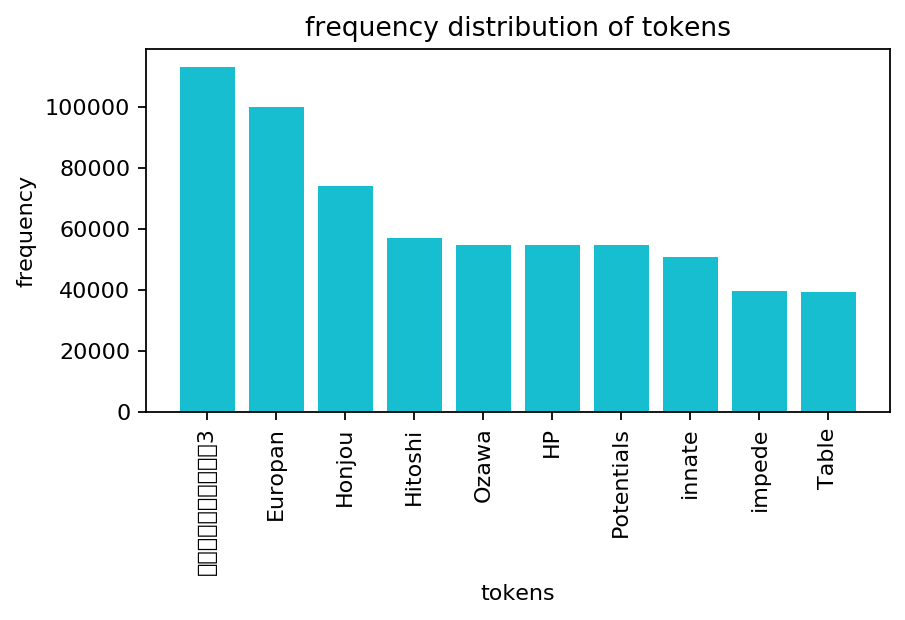

In [13]:
# plot freq distribution to tokens
plt.figure(figsize=(6, 3), dpi=160)
plt.bar(sorted_tokens[:10], sorted_freqs[:10], color='tab:cyan')
plt.xticks(sorted_tokens[:10], rotation=90)
plt.ylabel('frequency')
plt.xlabel('tokens')
plt.title('frequency distribution of tokens')
plt.show()

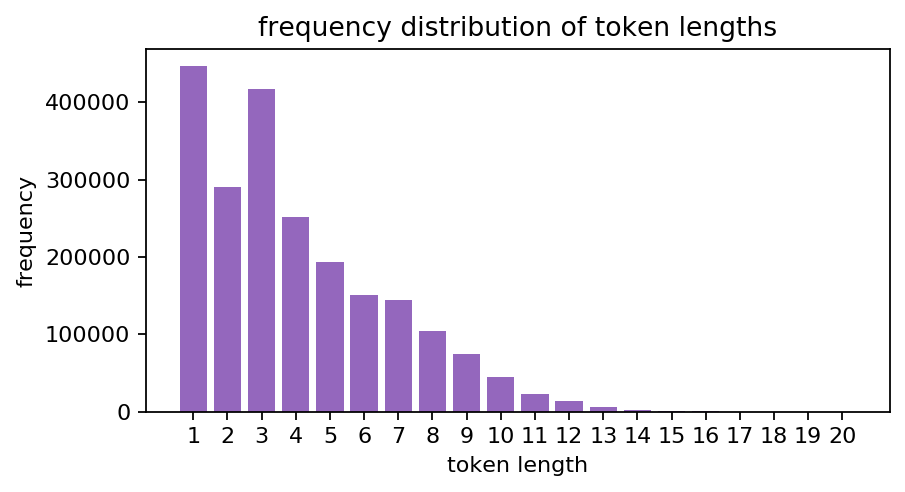

In [14]:
# plot freq distribution of token lengths
plt.figure(figsize=(6, 3), dpi=160)
plt.bar(lengths.keys(), lengths.values(), color='tab:purple')
plt.xticks(list(lengths.keys()))
plt.ylabel('frequency')
plt.xlabel('token length')
plt.title('frequency distribution of token lengths')
plt.show()